In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['fivethirtyeight', 'figsize'])
_SAVEDIR_ = 'Tex/figures/'

## Upwind 1D Continuity -  Constant Velocity

In [2]:
# Params
Nsteps = 500
nx = 500
sizeX = 1.0
dif = 0
vel = .1
# dx = sizeX/(nx-1)
x = np.linspace(0,1,Nsteps)
f = np.zeros([Nsteps,nx])
dx = x[1]-x[0]
cfl = .1
if dif != 0:
    dtd = .5*dx**2/dif
else:
    dtd = 1.0
if vel != 0:
    dta = dx/vel
dt = cfl * np.min([dtd,dta])

dnum = dx*dx/dt
delta = dif/dnum

sigma = 20*dx
xm = .5*(sizeX-sigma)
xp = .5*(sizeX+sigma)
f[0][(xm<x) & (x<xp)] = 1


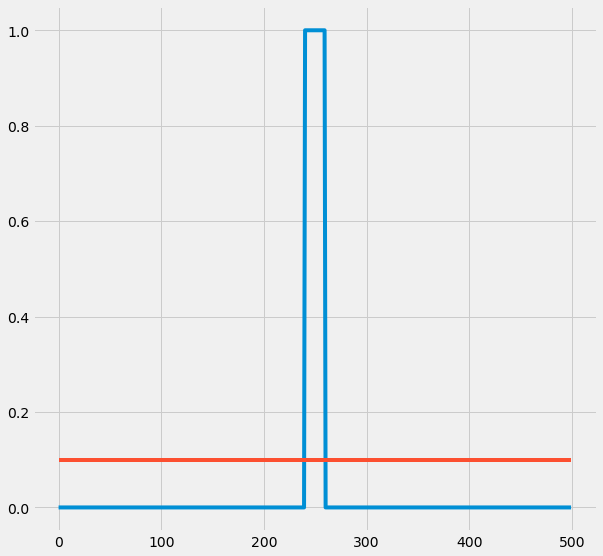

In [3]:
f[0][(xm<x) & (x<xp)] = 1
plt.plot(f[0])

u = np.ones(nx)*vel
plt.plot(u)

In [4]:
def diag(x,f,_savename_ = None ):
    def calc_H(f,dx):
        tot = 0
        for i in f.flatten():
            tot += i*i*dx
        return tot
    def calc_M0(f,dx):
        tot =0
        for i in f.flatten():
            tot += i*dx
        return tot
    def calc_M1(f,x,dx):
        return np.dot(f,x*dx)

    def norm(x):
        np.array(x)
        x/=np.max(x)
        return x
    def unit_H(f, dx, M0):
        tot = 0 
        for i in f.flatten():
            tot += i*i**dx/M0
        return tot
    dx = x[1]-x[0]
    list_H = []
    list_M0 = []
    list_M1 = []
    list_unit_H = []
    for i in range(len(f)-1):
        list_H.append(calc_H(f[i],dx))
        list_M0.append(calc_M0(f[i],dx))
        list_M1.append(calc_M1(f[i],x,dx))
        list_unit_H.append(unit_H(f[i],dx,list_M0[-1]))
#     print(M0_prime)
#     print(list_H[1:6])
    plt.figure(figsize =(9,9))
    plt.plot(list(range(len(f)-1)),norm(list_H),'k',lw=5 , label = r"$H_2$")
    plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
#     plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
    plt.plot(list(range(len(f)-1)),norm(list_unit_H),':',lw=5 , label = r"$H/M0$")

#     plt.plot(list(range(len(f)-2)),norm(M0_prime),label = 'M0_prime')
#     plt.plot(list(range(len(f)-1)),norm(list_M1),'--',lw=5 , label = r"$M_1$")
#     print(np.array(list_M1)-np.array(list_M0))
    fs = 20
    plt.ylabel("Normalized Value",fontsize =fs)
    plt.legend(fontsize = fs)

    plt.xlabel("Time step",fontsize = fs)
    if _savename_ is not None:
        plt.savefig(_savename_)
    else:
        plt.show()
    return list(range(len(f)-1)), list_M0, list_M1, list_H, list_unit_H
def _upwind_matrix_PBC(u, dx, h, NX, Nsteps):


    T = np.zeros([NX,NX])
    T[0][0] = 1-u[0]*h/dx
    T[0][-1] = u[-1]*h/dx

    T[-1][-1] = 1-u[-1]*h/dx
    T[-1][-2] = u[-2]*h/dx
    
    
    for n in range(1,NX-1):
        T[n][n-1] = u[n-1]*h/dx
        T[n][n]   = 1 - u[n]*h/dx
        T[n][n+1] = 0
        

    sizex = 1
    dx = 1. /NX
    
    x = np.linspace(0,1,NX)
    f = np.zeros([Nsteps, NX])

    sigma = 20*dx
    xm = .5*(sizeX-sigma)
    xp = .5*(sizeX+sigma)
    f[0][(xm<x) & (x<xp)] = 1

    return T,f
T,f2 = _upwind_matrix_PBC(u,dx,dt, nx,Nsteps )

In [5]:
for it in range(1,Nsteps):
    f[it] = np.dot(T,f[it-1])

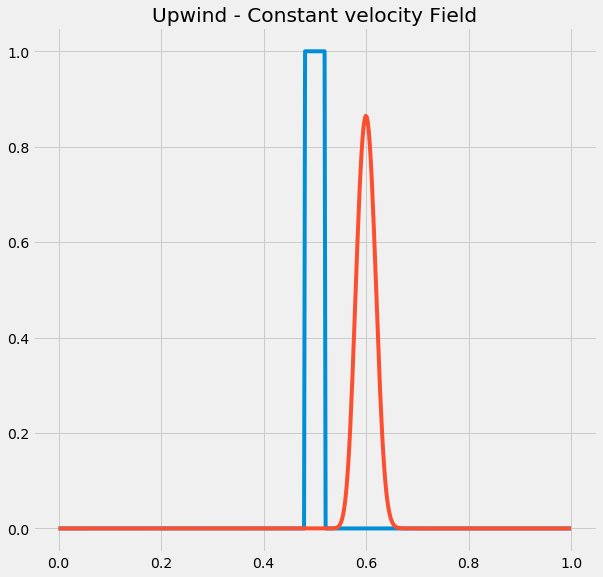

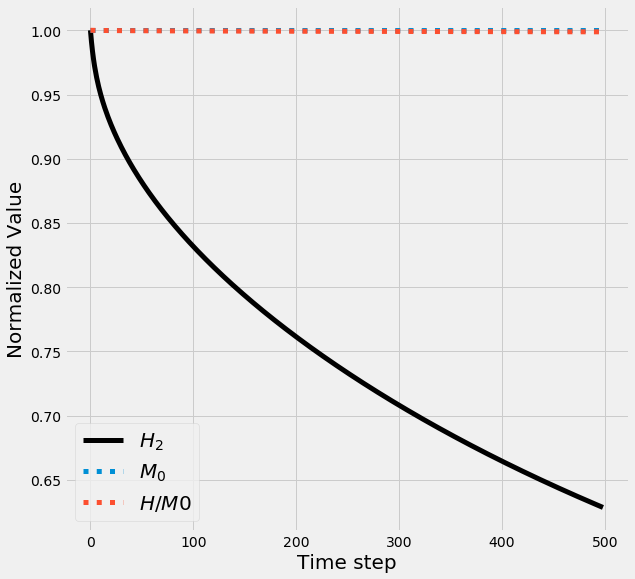

In [6]:
plt.title("Upwind - Constant velocity Field")
plt.plot(x,f[0])
plt.plot(x,f[-1])
plt.show()
diag_out = diag(x,f)

## Lax-Wendroff

In [7]:
def _LW_matrix_PBC(u, dx, h, NX, Nsteps):
    # u must be const
    T = np.zeros([NX,NX])
    alpha = u*h/dx
    a = alpha/2 * (1 + alpha)
    b = alpha/2 * (alpha - 1)
    c = (1-alpha**2)
    
    T[0][0] = c
    T[-1][-1] = c
    
    T[0][1] = b
    T[-1][-2] = a
    
    T[0][-1] = a
    T[-1][0] = b

    
    for n in range(1,NX-1):
        T[n][n-1] = a
        T[n][n]   = c
        T[n][n+1] = b
        

    sizex = 1
    dx = 1. /NX
    
    x = np.linspace(0,1,NX)
    f = np.zeros([Nsteps, NX])

    sigma = 20*dx
    xm = .5*(sizeX-sigma)
    xp = .5*(sizeX+sigma)
    f[0][(xm<x) & (x<xp)] = 1

    return T,f

0.00200400801603
0.0200400801603
[[ 0.99  -0.045  0.    ...,  0.     0.     0.055]
 [ 0.055  0.99  -0.045 ...,  0.     0.     0.   ]
 [ 0.     0.055  0.99  ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.99  -0.045  0.   ]
 [ 0.     0.     0.    ...,  0.055  0.99  -0.045]
 [-0.045  0.     0.    ...,  0.     0.055  0.99 ]]


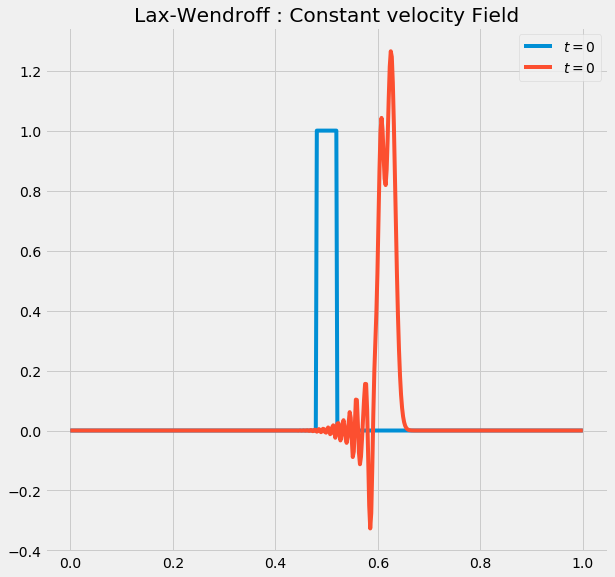

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


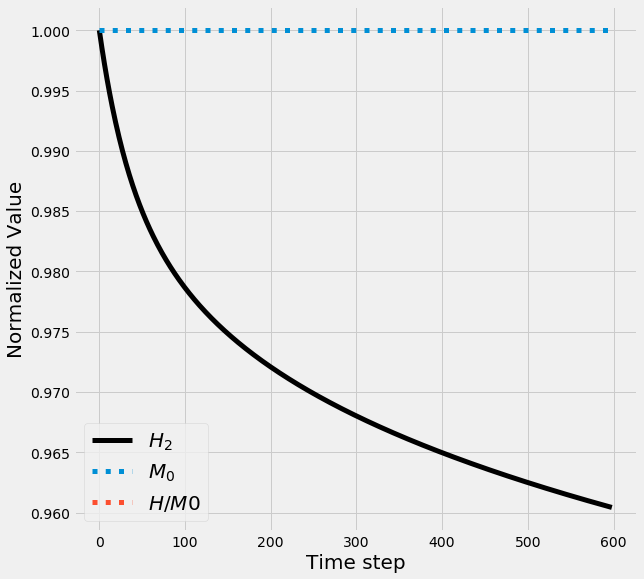

In [8]:
print(dt)
print(dx/vel)
Nsteps = 600
T,f = _LW_matrix_PBC(vel, dx,dt, nx,Nsteps )
print(T)
for it in range(1,Nsteps):
    f[it] = np.dot(T,f[it-1])
plt.title("Lax-Wendroff : Constant velocity Field")
plt.plot(x,f[0],label = "$t=0$")
plt.plot(x,f[-1],label = "$t=0$")
# plt.ylim([-.5,1])
plt.legend()

plt.savefig(_SAVEDIR_+"LaxWen_constU.png")
plt.show()
diag_out = diag(x,f,_savename_ = _SAVEDIR_+"LaxWen_constU_diag.png")

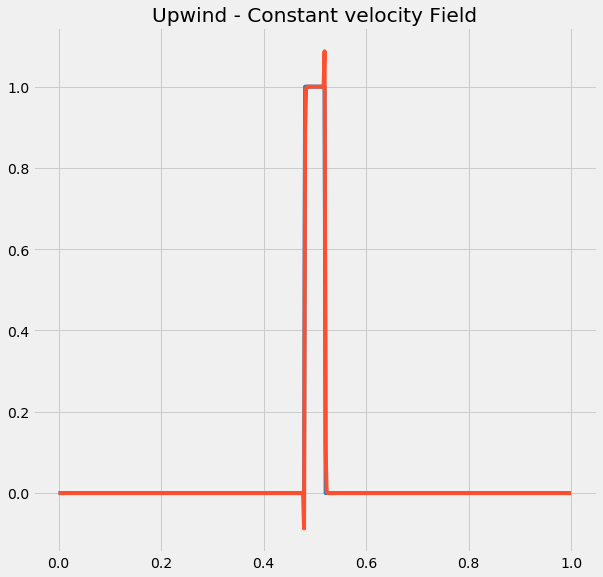

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


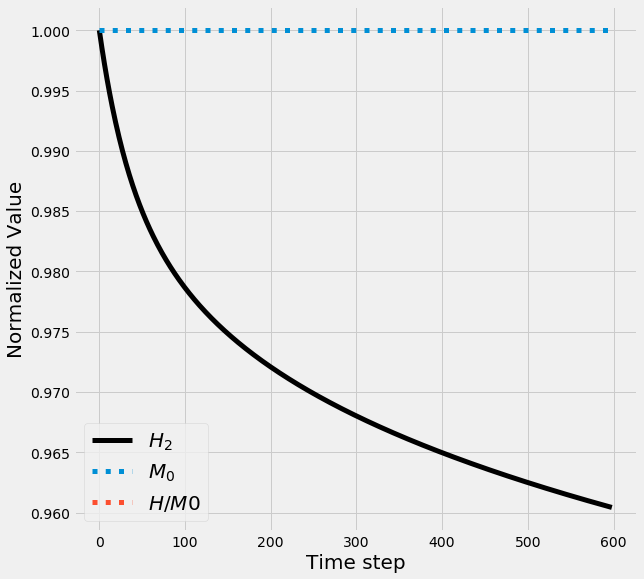

In [9]:
plt.title("Upwind - Constant velocity Field")
plt.plot(x,f[0])
plt.plot(x,f[2])
plt.show()
diag_out = diag(x,f)

# Flux Correct Transport

# SHASTA

In [10]:
# Params
Nsteps = 500
nx = 500
sizeX = 1.0
dif = 0
vel = .1

adif = -.125
vel = .5

x = np.linspace(0,1,Nsteps)
f = np.zeros([Nsteps,nx])
dx = x[1]-x[0]
cfl = .1
if dif != 0:
    dtd = .5*dx**2/dif
else:
    dtd = 1.0
if vel != 0:
    dta = dx/vel
dt = cfl * np.min([dtd,dta])

dnum = dx*dx/dt
delta = dif/dnum

sigma = 20*dx
xm = .5*(sizeX-sigma)
xp = .5*(sizeX+sigma)
f[0][(xm<x) & (x<xp)] = 1





In [11]:
def flux_corrector(f,j):
    delta_left_1 = f[j]-f[j-1]
    delta_left_2 = f[j-1]-f[j-2]
    delta_right_1 = f[j+1]-f[j]
    delta_right_2 = f[j+2]-f[j+1]
    
    fc_right = np.sign(delta_right_1)*np.max([0,
            np.min([delta_left_1*np.sign(delta_right_1),
                    .125*np.abs(delta_right_1),
                    delta_right_2*np.sign(delta_right_1)])])
    fc_left = np.sign(delta_left_1)*np.max([0,
        np.min([delta_right_1*np.sign(delta_left_1),
                .125*np.abs(delta_left_1),
                delta_left_2*np.sign(delta_left_1)])])

In [12]:
def _SHASTA_matrix_PBC(u, dx, h, NX, Nsteps):
    alpha = u*h/dx
    A = .5+alpha
    B = .5 - alpha
    a = A**2/2
    b = B**2/2
    c = A+B-(A**2+B**2)/2
    T = np.zeros([NX,NX])
    T[0][0] = c
    T[-1][-1] = c
    
    T[0][1] = b
    T[-1][-2] = a
    
    T[0][-1] = a
    T[-1][0] = b
    
    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b    

    sizex = 1
    dx = 1. /NX
    
    x = np.linspace(0,1,NX)
    f = np.zeros([Nsteps, NX])

    sigma = 20*dx
    xm = .5*(sizeX-sigma)
    xp = .5*(sizeX+sigma)
    f[0][(xm<x) & (x<xp)] = 1

    return T,f

0.000400801603206
0.00400801603206
[[ 0.74  0.08  0.   ...,  0.    0.    0.18]
 [ 0.18  0.74  0.08 ...,  0.    0.    0.  ]
 [ 0.    0.18  0.74 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.74  0.08  0.  ]
 [ 0.    0.    0.   ...,  0.18  0.74  0.08]
 [ 0.08  0.    0.   ...,  0.    0.18  0.74]]


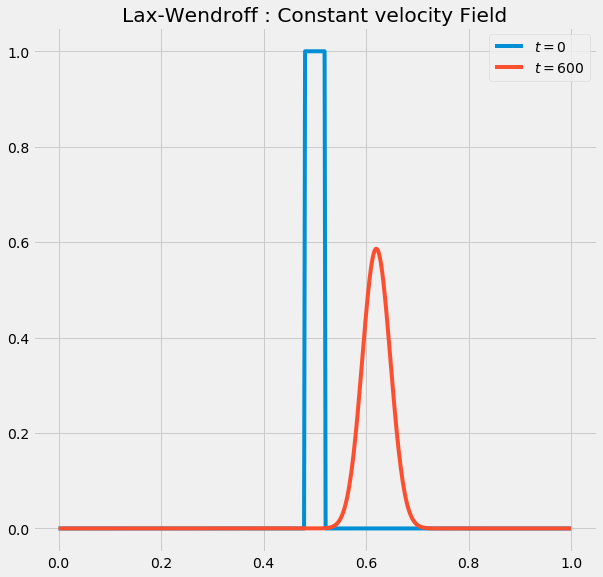

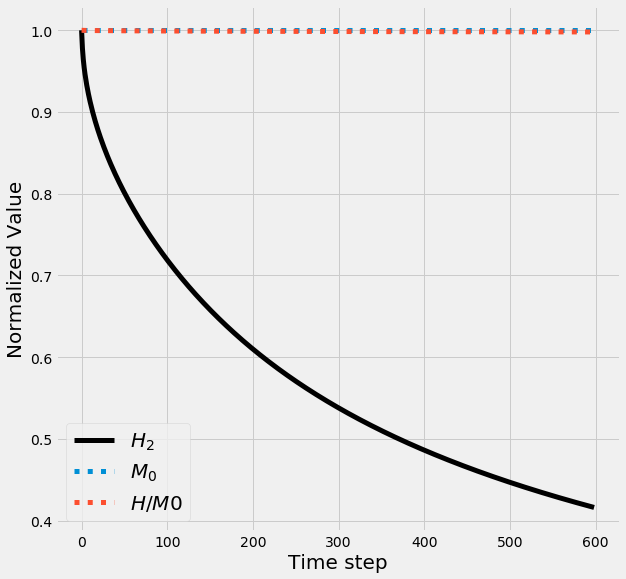

In [13]:
print(dt)
print(dx/vel)
Nsteps = 600
T,f = _SHASTA_matrix_PBC(vel, dx,dt, nx,Nsteps )
print(T)
for it in range(1,Nsteps):
    f[it] = np.dot(T,f[it-1])
plt.title("Lax-Wendroff : Constant velocity Field")
plt.plot(x,f[0],label = "$t=0$")
plt.plot(x,f[-1],label = "$t={:}$".format(Nsteps))
# plt.ylim([-.5,1])
plt.legend()

# plt.savefig(_SAVEDIR_+"LaxWen_constU.png")
plt.show()
diag_out = diag(x,f,_savename_ = _SAVEDIR_+"LaxWen_constU_diag.png")

## Add artificial antidiffusion

[[ 0.74  0.08  0.   ...,  0.    0.    0.18]
 [ 0.18  0.74  0.08 ...,  0.    0.    0.  ]
 [ 0.    0.18  0.74 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.74  0.08  0.  ]
 [ 0.    0.    0.   ...,  0.18  0.74  0.08]
 [ 0.08  0.    0.   ...,  0.    0.18  0.74]]


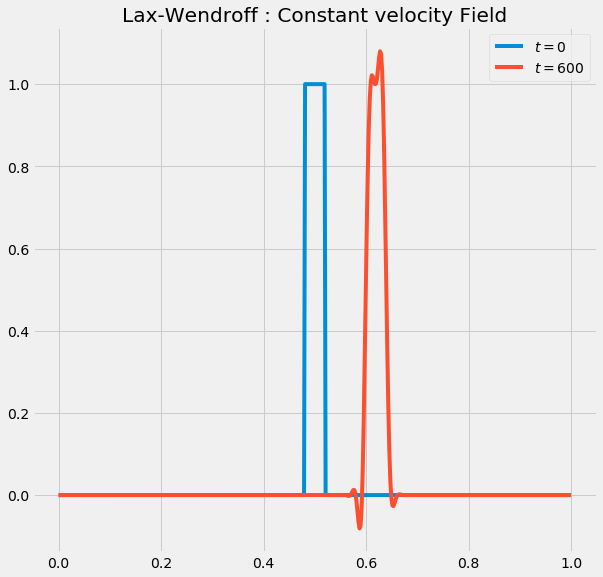

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


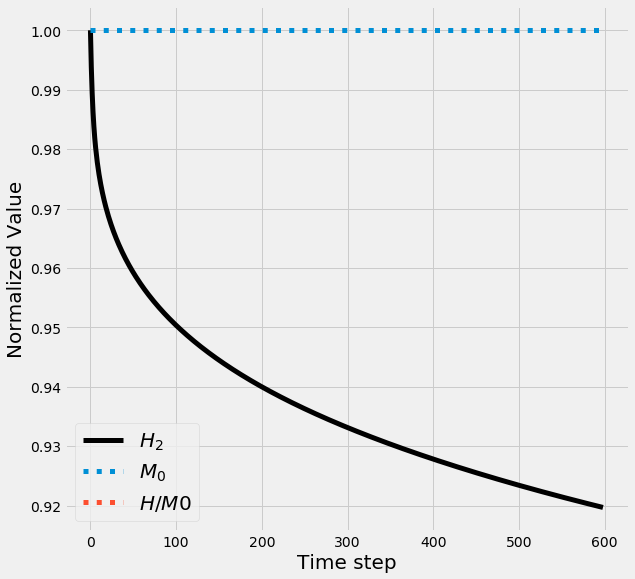

In [14]:

Nsteps = 600
T,f = _SHASTA_matrix_PBC(vel, dx,dt, nx,Nsteps )
print(T)
for it in range(1,Nsteps):
    f[it] = np.dot(T,f[it-1])
    fc_right = np.zeros(nx)
    fc_left = np.zeros(nx)
    for j in range(0,nx):
        fc_right[j] = adif*(np.ediff1d(np.take(f[it], [j,j+1],mode='wrap')))
        fc_left[j] = adif*(np.ediff1d(np.take(f[it], [j,j-1],mode='wrap')))

    f[it] = f[it] + fc_right + fc_left
plt.title("Lax-Wendroff : Constant velocity Field")
plt.plot(x,f[0],label = "$t=0$")
plt.plot(x,f[-1],label = "$t={:}$".format(Nsteps))
# plt.ylim([-.5,1])
plt.legend()

# plt.savefig(_SAVEDIR_+"LaxWen_constU.png")
plt.show()
diag_out = diag(x,f,_savename_ = _SAVEDIR_+"LaxWen_constU_diag.png")

In [15]:
np.take([0,1,2], 4, mode = 'wrap')

1

# Full SHASTA

In [16]:
def flux_corrector(f,nx):
    fc_right = np.zeros(nx)
    fc_left = np.zeros(nx)
    for j in range(0,nx):
        delta_left_1 = np.ediff1d(np.take(f, [j-1,j],mode='wrap'))
        delta_left_2 = np.ediff1d(np.take(f, [j-2,j-1],mode='wrap'))
        delta_right_1 = np.ediff1d(np.take(f, [j,j+1],mode='wrap'))
        delta_right_2 = np.ediff1d(np.take(f, [j+1,j+2],mode='wrap'))
#         if delta_right_1 != 0:
#             print("\n\n======")
#             print(j)
#             print(delta_right_1)
#             print(delta_right_2)
        
#         delta_left_1 = np.ediff1d(np.take(f, [j,j-1],mode='wrap'))
#         delta_left_2 = np.ediff1d(np.take(f, [j-1,j-2],mode='wrap'))
#         delta_right_1 = np.ediff1d(np.take(f, [j,j+1],mode='wrap'))
#         delta_right_2 = np.ediff1d(np.take(f, [j+1,j+2],mode='wrap'))
        #sauro pres - everything minus one for left
#         delta_left_1 = np.ediff1d(np.take(f, [j,j-1],mode='wrap'))
#         delta_left_2 = np.ediff1d(np.take(f, [j-1,j-2],mode='wrap'))
#         delta_right_1 = np.ediff1d(np.take(f, [j,j+1],mode='wrap'))
#         delta_right_2 = np.ediff1d(np.take(f, [j+1,j+2],mode='wrap'))



        fc_right[j] = np.sign(delta_right_1)*np.max([0,
                np.min([delta_left_1*np.sign(delta_right_1),
                    .125*np.abs(delta_right_1),
                    delta_right_2*np.sign(delta_right_1)])])
        fc_left[j] = np.sign(delta_left_1)*np.max([0,
                np.min([delta_right_1*np.sign(delta_left_1),
                    .125*np.abs(delta_left_1),
                    delta_left_2*np.sign(delta_left_1)])])
#     print(fc_left.shape)
#     print(np.min(fc_right))
    return fc_left-fc_right
    


[[ 0.74  0.08  0.   ...,  0.    0.    0.18]
 [ 0.18  0.74  0.08 ...,  0.    0.    0.  ]
 [ 0.    0.18  0.74 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.74  0.08  0.  ]
 [ 0.    0.    0.   ...,  0.18  0.74  0.08]
 [ 0.08  0.    0.   ...,  0.    0.18  0.74]]


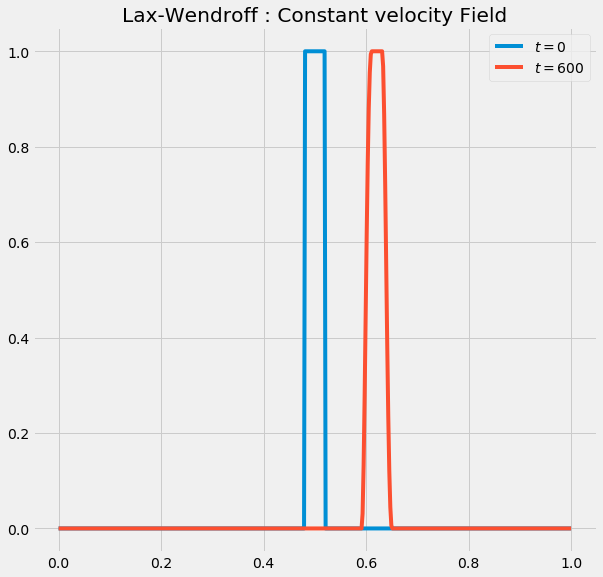

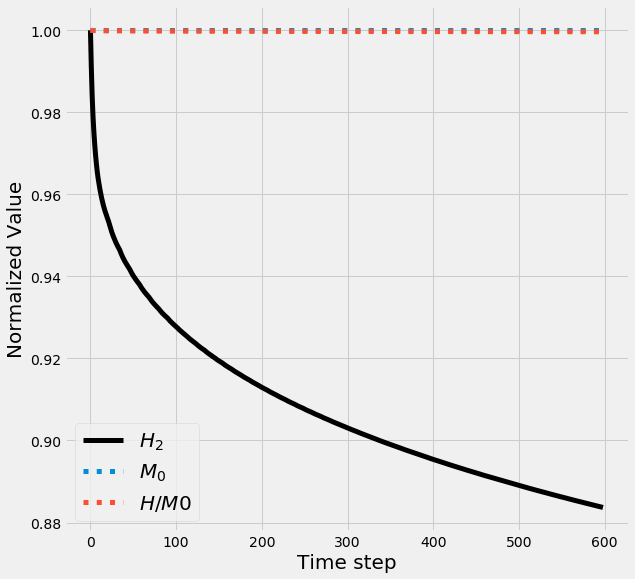

In [17]:

Nsteps = 600
T,f = _SHASTA_matrix_PBC(vel, dx,dt, nx,Nsteps )
print(T)
for it in range(1,Nsteps):
    f[it] = np.dot(T,f[it-1])
    f[it] = f[it] + flux_corrector(f[it],nx)
plt.title("Lax-Wendroff : Constant velocity Field")
plt.plot(x,f[0],label = "$t=0$")
plt.plot(x,f[-1],label = "$t={:}$".format(Nsteps))
# plt.ylim([-.5,1])
plt.legend()

# plt.savefig(_SAVEDIR_+"LaxWen_constU.png")
plt.show()
diag_out = diag(x,f,_savename_ = _SAVEDIR_+"LaxWen_constU_diag.png")

In [18]:
np.ediff1d(np.take([0,1,1,3,4], [2,3],mode='wrap'))

array([2])

In [19]:
adif

-0.125

In [20]:
pwd

'/home/ianhi/Documents/courses/AC274/HW/HW_3'